In [1]:
from exp.nb_loading import *

In [2]:
wheat= DataBlock(blocks=(ImageBlock, BBoxBlock, BBoxLblBlock),
                 get_items=get_items,
                 splitter=RandomSplitter(),
                 get_y=[get_bbox, get_lbl],
                 item_tfms=Resize(512, method=ResizeMethod.Pad),
                 n_inp=1)

In [3]:
model = get_net()

In [4]:
dls = wheat.dataloaders(path,bs=2)

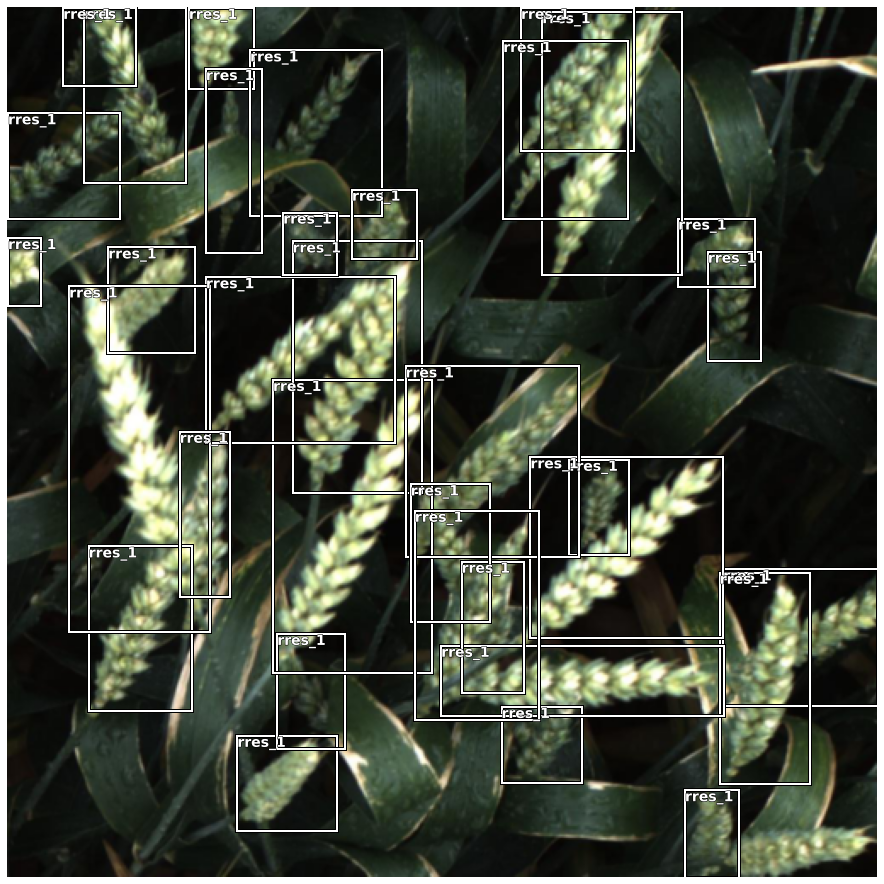

In [5]:
dls.show_batch(max_n=1, figsize=(16,16)
              )

## Model 

In [6]:
from pdl import *

In [7]:
encoder = create_body(resnet18, pretrained=True)

In [8]:
get_c(dls)

76

In [9]:
arch = RetinaNet(encoder, get_c(dls), final_bias=-4)

### Loss Function 

In [10]:
ratios = [1/2,1,2]
scales = [1,2**(-1/3), 2**(-2/3)]
crit = RetinaNetFocalLoss(scales=scales, ratios=ratios)

In [11]:
def _retinanet_split(m): return L(m.encoder,nn.Sequential(m.c5top6, m.p6top7, m.merges, m.smoothers, m.classifier, m.box_regressor)).map(params)

In [12]:
learn = Learner(dls, arch, loss_func=crit, splitter=_retinanet_split)
learn.freeze()

In [ ]:
learn.lr_find()

/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)
